In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

In [2]:
data = pd.read_csv(r"C:\Users\Adithiyha R\Downloads\All Data.csv", header=0)
new_df = data.drop('Unnamed: 0', axis='columns')
new_df.head(10)

,Tn (Rated Torque) N*m,k (constant of proportionality),time (sec),Ia (Amp),Ib (Amp),Ic (Amp),Vab (V),Torque (N*m),Speed (rad/s),Category
0,0.8,0.000948,0.0000,0.0,0.0,0.0,0.0,0.000000,157.079633,NOM
1,0.8,0.000948,0.0005,0.0,0.0,0.0,0.0,-0.009380,156.173693,NOM
2,0.8,0.000948,0.0010,0.0,0.0,0.0,0.0,0.217542,155.281539,NOM
3,0.8,0.000948,0.0015,0.0,0.0,0.0,0.0,-0.050265,154.401984,NOM
4,0.8,0.000948,0.0020,0.0,0.0,0.0,0.0,-0.076747,153.525611,NOM
5,0.8,0.000948,0.0025,0.0,0.0,0.0,0.0,-0.289886,152.657362,NOM
6,0.8,0.000948,0.0030,0.0,0.0,0.0,0.0,-2.151535,151.759071,NOM
7,0.8,0.000948,0.0035,0.0,0.0,0.0,0.0,-1.536755,150.847611,NOM
8,0.8,0.000948,0.0040,0.0,0.0,0.0,0.0,-5.618788,149.863091,NOM
9,0.8,0.000948,0.0045,0.0,0.0,0.0,0.0,-5.287835,148.836670,NOM


In [3]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40040 entries, 0 to 40039
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tn (Rated Torque) N*m            40040 non-null  float64
 1   k (constant of proportionality)  40040 non-null  float64
 2   time (sec)                       40040 non-null  float64
 3   Ia (Amp)                         40040 non-null  float64
 4   Ib (Amp)                         40040 non-null  float64
 5   Ic (Amp)                         40037 non-null  float64
 6   Vab (V)                          40040 non-null  float64
 7   Torque (N*m)                     40040 non-null  float64
 8   Speed (rad/s)                    40040 non-null  float64
 9   Category                         40040 non-null  object 
dtypes: float64(9), object(1)
memory usage: 3.1+ MB


In [4]:
new_df.describe()

,Tn (Rated Torque) N*m,k (constant of proportionality),time (sec),Ia (Amp),Ib (Amp),Ic (Amp),Vab (V),Torque (N*m),Speed (rad/s)
count,40040.00000,40040.000000,40040.000000,40040.000000,40040.000000,40037.000000,40040.000000,40040.000000,40040.000000
mean,1.13875,0.001349,0.250000,17.897379,17.764825,18.467770,432.839346,23.533621,123.521359
std,0.37178,0.000441,0.144484,10.673854,10.472963,10.509529,123.434004,59.284940,49.801346
min,0.80000,0.000948,0.000000,0.000000,0.000000,0.000000,0.000000,-404.837797,-112.258007
25%,0.91875,0.001085,0.125000,11.470259,11.470080,11.741091,389.693296,19.149998,132.843872
50%,1.03750,0.001230,0.250000,13.746103,13.783993,14.274370,474.566561,26.668772,142.900833
75%,1.18125,0.001400,0.375000,23.355132,22.572962,24.037634,474.984304,36.350223,147.744026
max,2.50000,0.002964,0.500000,78.639350,79.113988,78.738940,649.516523,625.165923,182.599449


In [5]:
new_df.isnull().sum()

Tn (Rated Torque) N*m              0
k (constant of proportionality)    0
time (sec)                         0
Ia (Amp)                           0
Ib (Amp)                           0
Ic (Amp)                           3
Vab (V)                            0
Torque (N*m)                       0
Speed (rad/s)                      0
Category                           0
dtype: int64

In [6]:
new_df.Category.value_counts()

Category
NOM     13013
PTPF     7007
PTGF     7007
OVF      5005
OLF      5005
UVF      3003
Name: count, dtype: int64

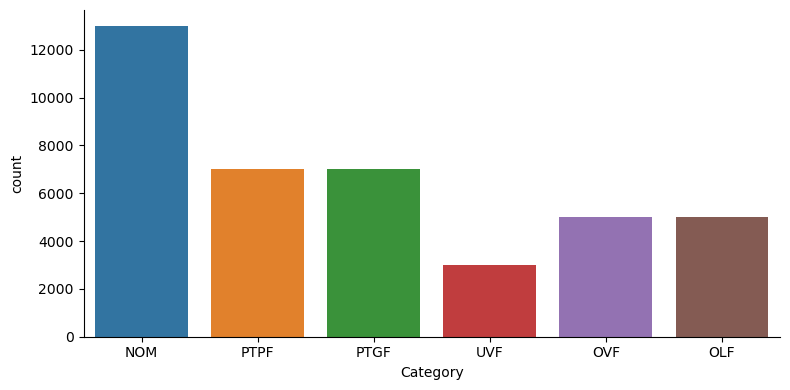

In [7]:
sns.catplot(data=new_df, x='Category', kind='count', height=4, aspect=2)

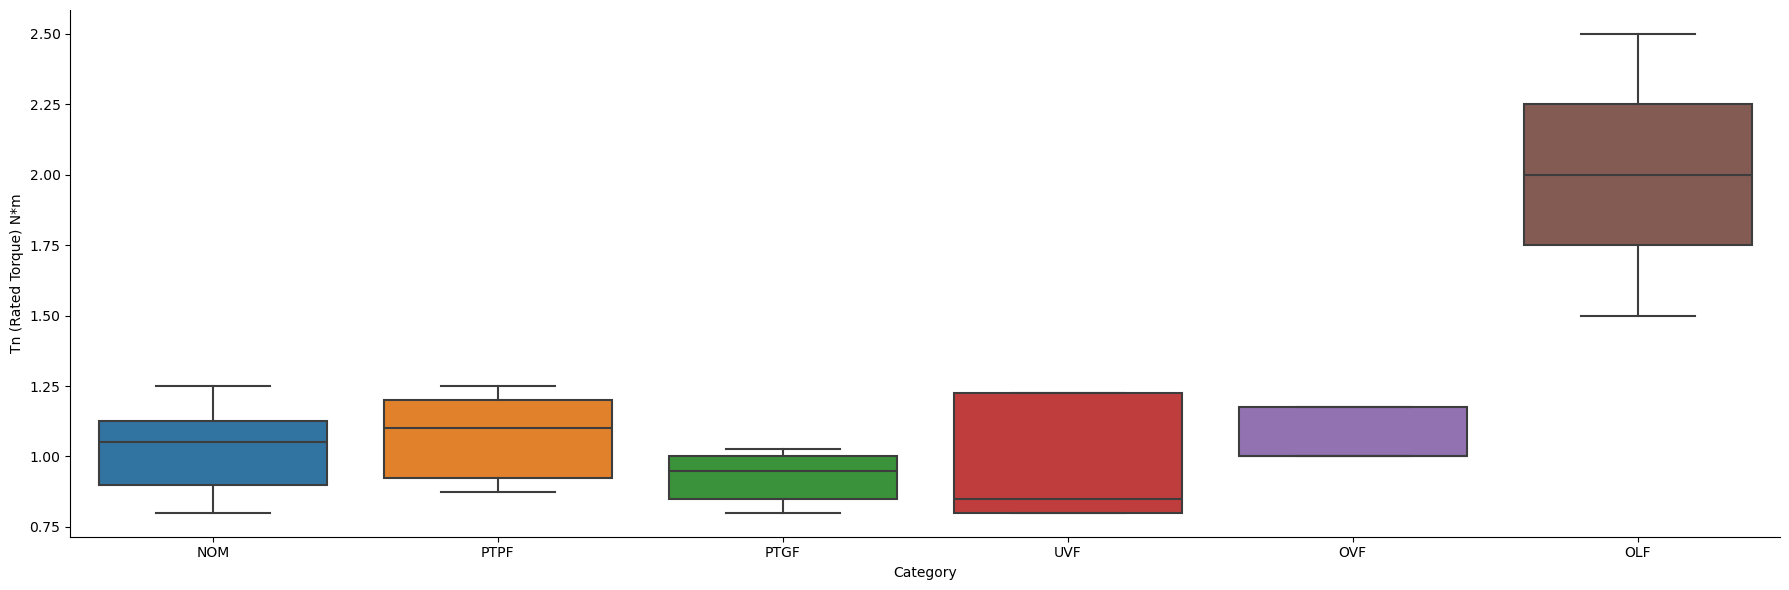

In [8]:
sns.catplot(data=new_df, x='Category', y='Tn (Rated Torque) N*m', kind='box', height=6, aspect=3)

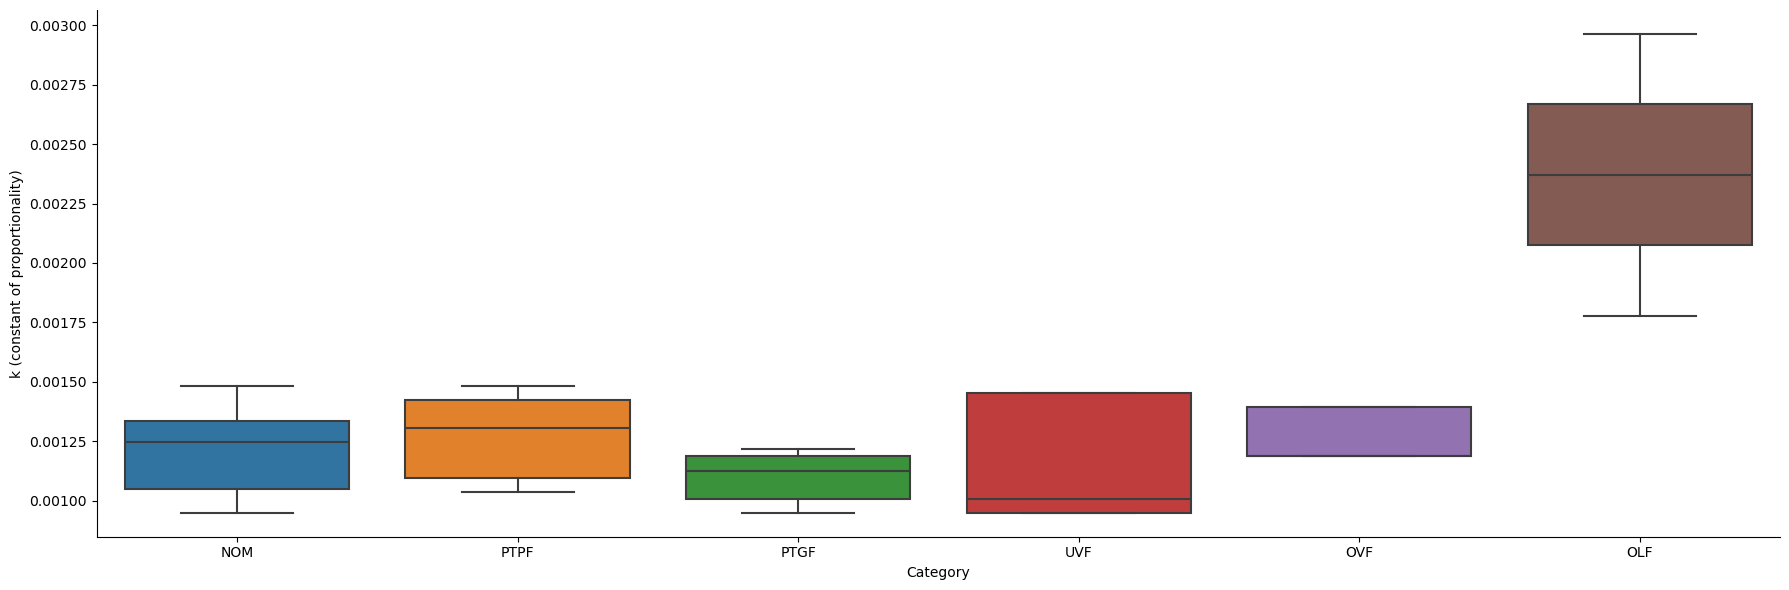

In [9]:
sns.catplot(data=new_df, x='Category', y='k (constant of proportionality)', kind='box', height=6, aspect=3)

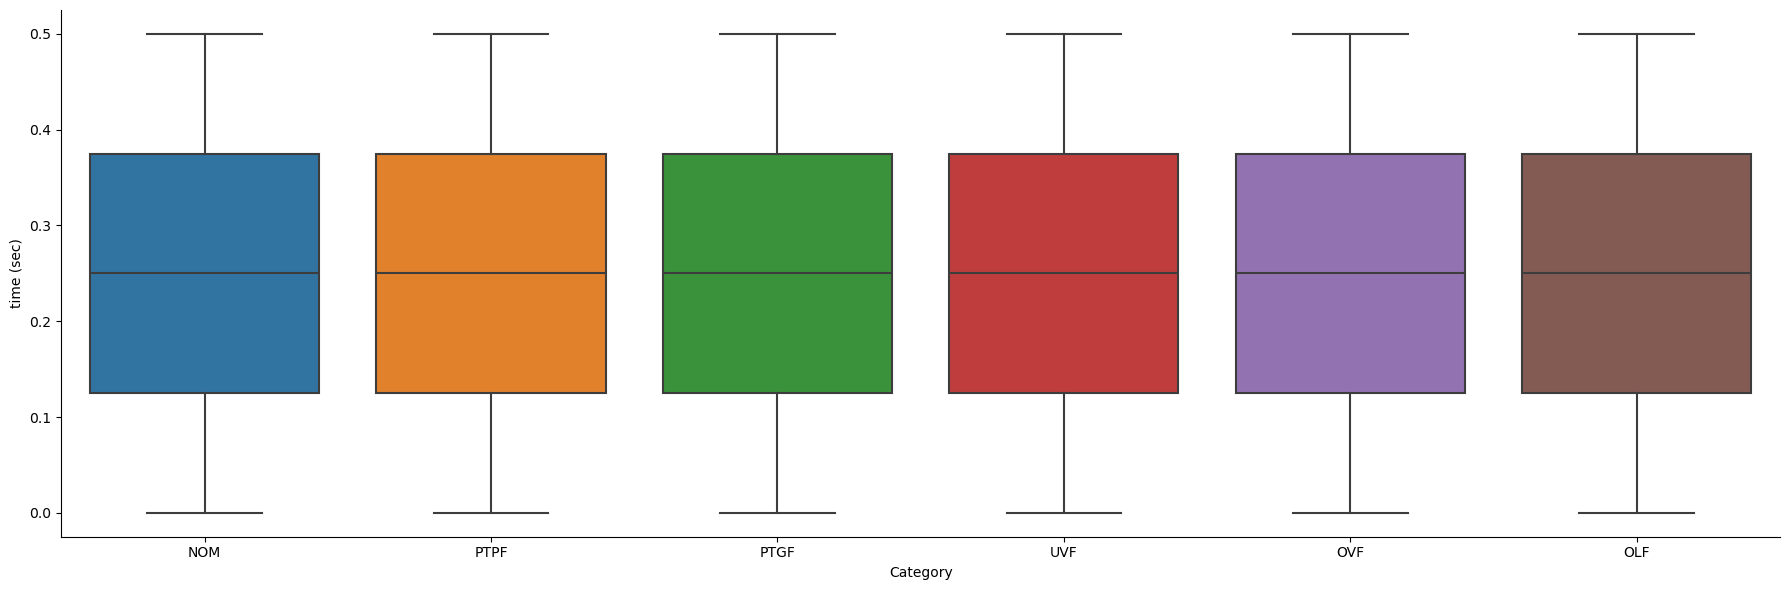

In [10]:
sns.catplot(data=new_df, x='Category', y='time (sec)', kind='box', height=6, aspect=3)

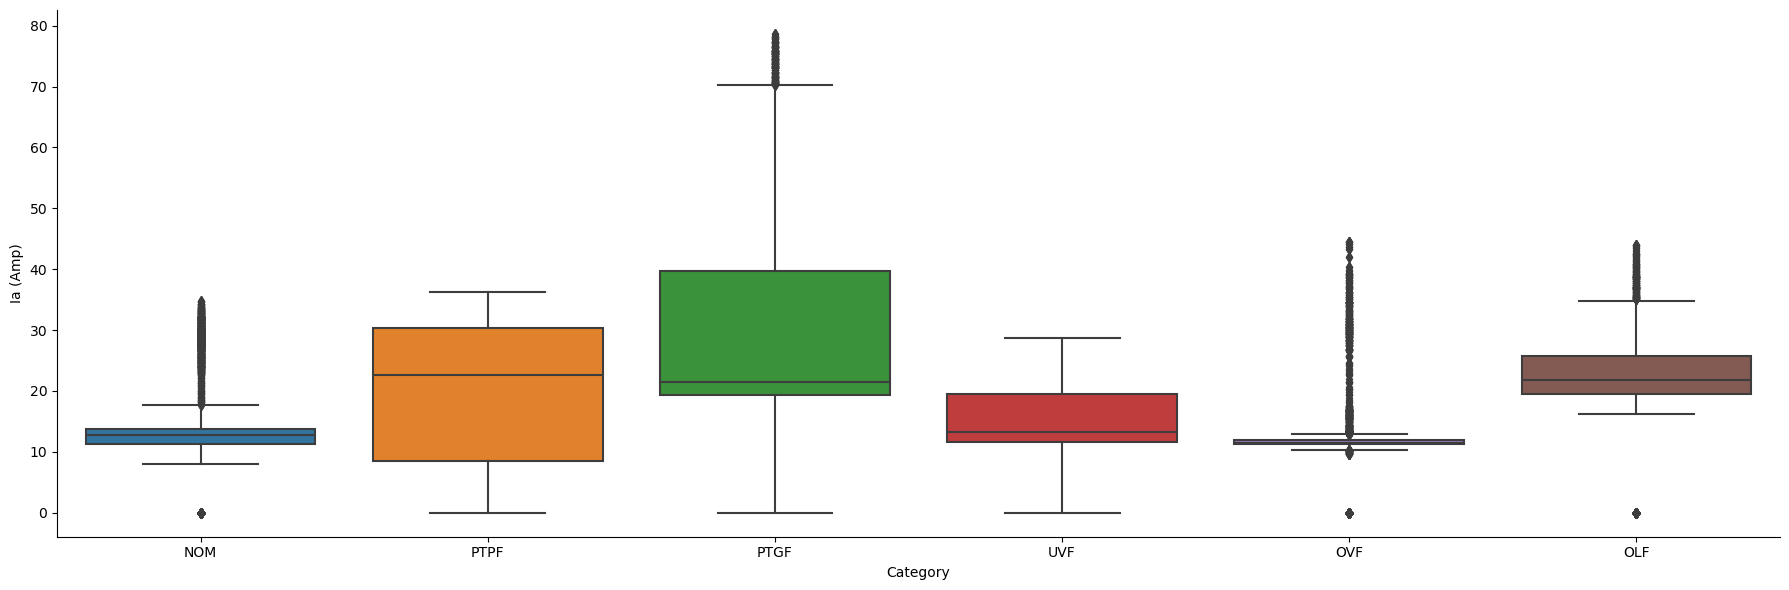

In [11]:
sns.catplot(data=new_df, x='Category', y='Ia (Amp)', kind='box', height=6, aspect=3)

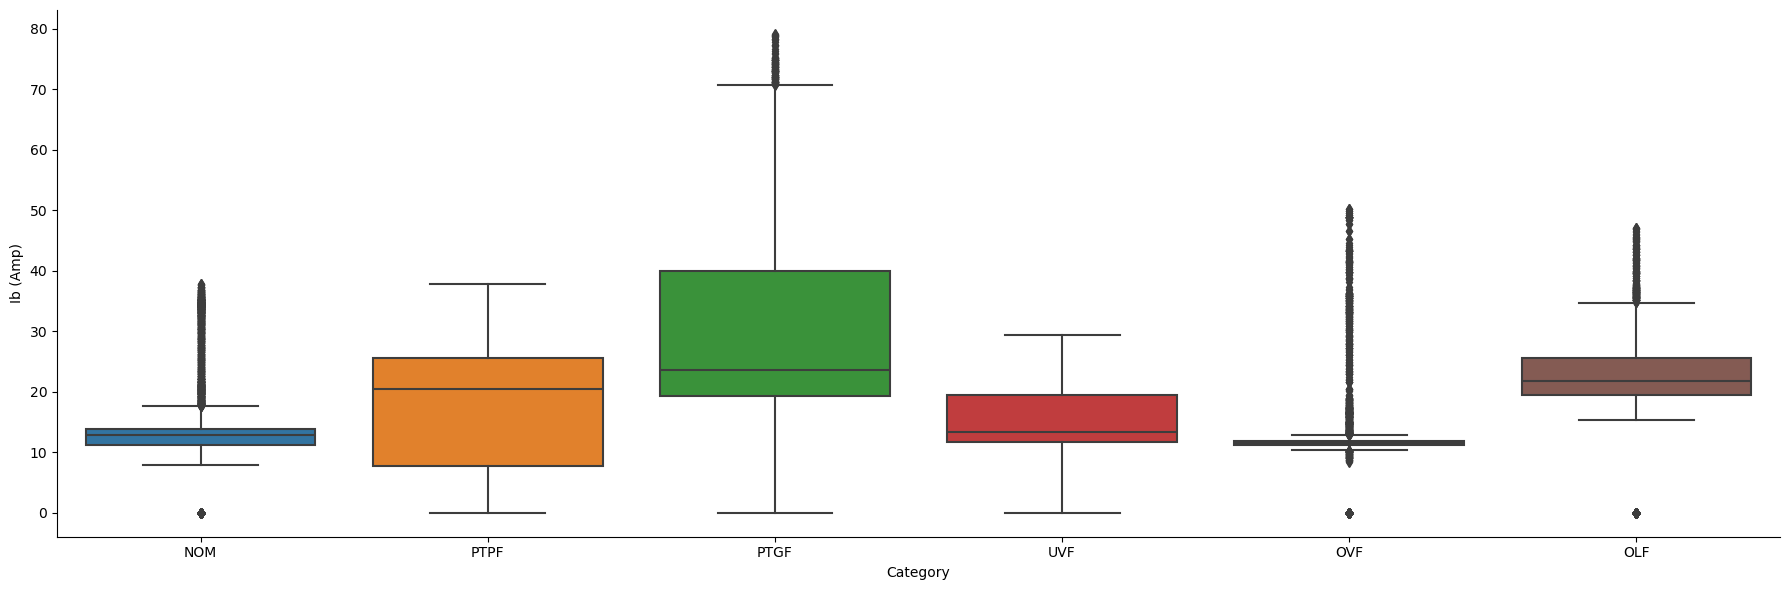

In [12]:
sns.catplot(data=new_df, x='Category', y='Ib (Amp)', kind='box', height=6, aspect=3)

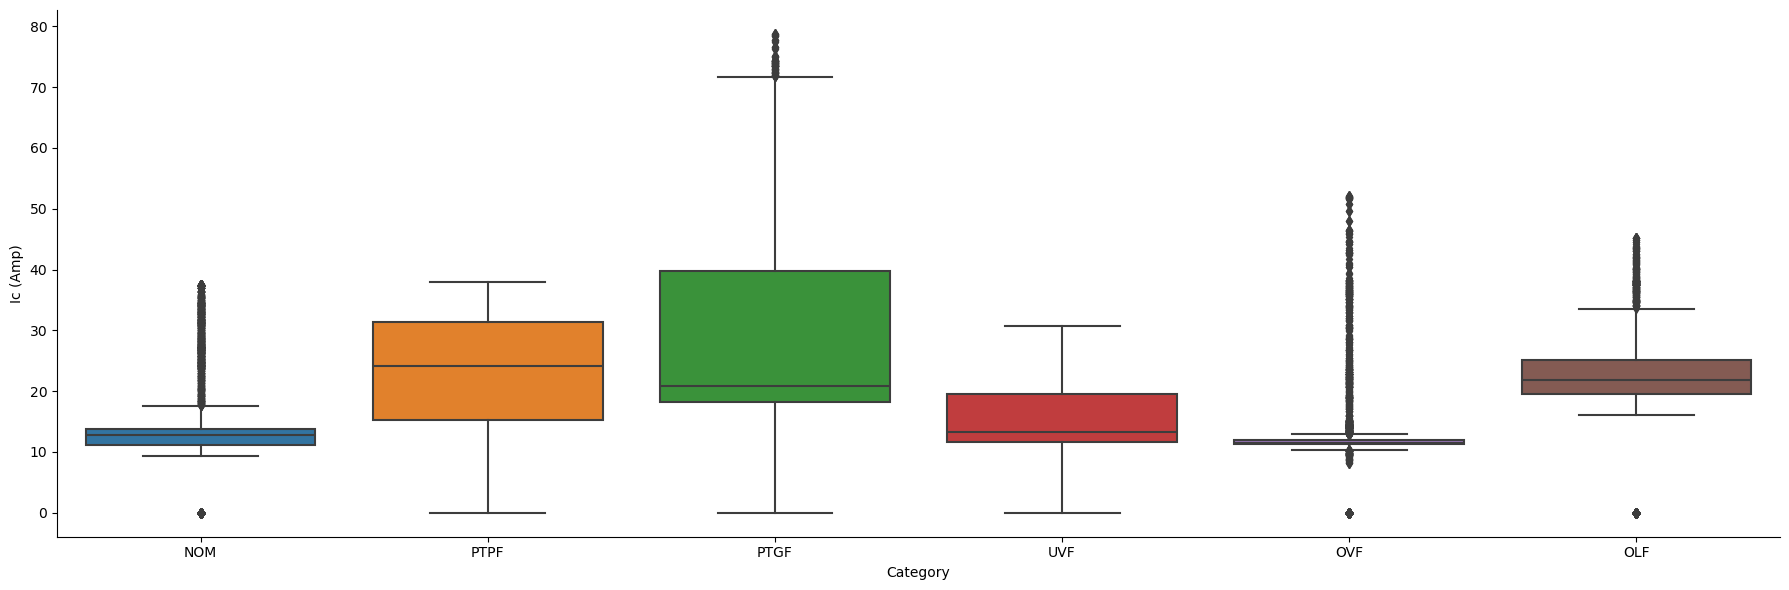

In [13]:
sns.catplot(data=new_df, x='Category', y='Ic (Amp)', kind='box', height=6, aspect=3)

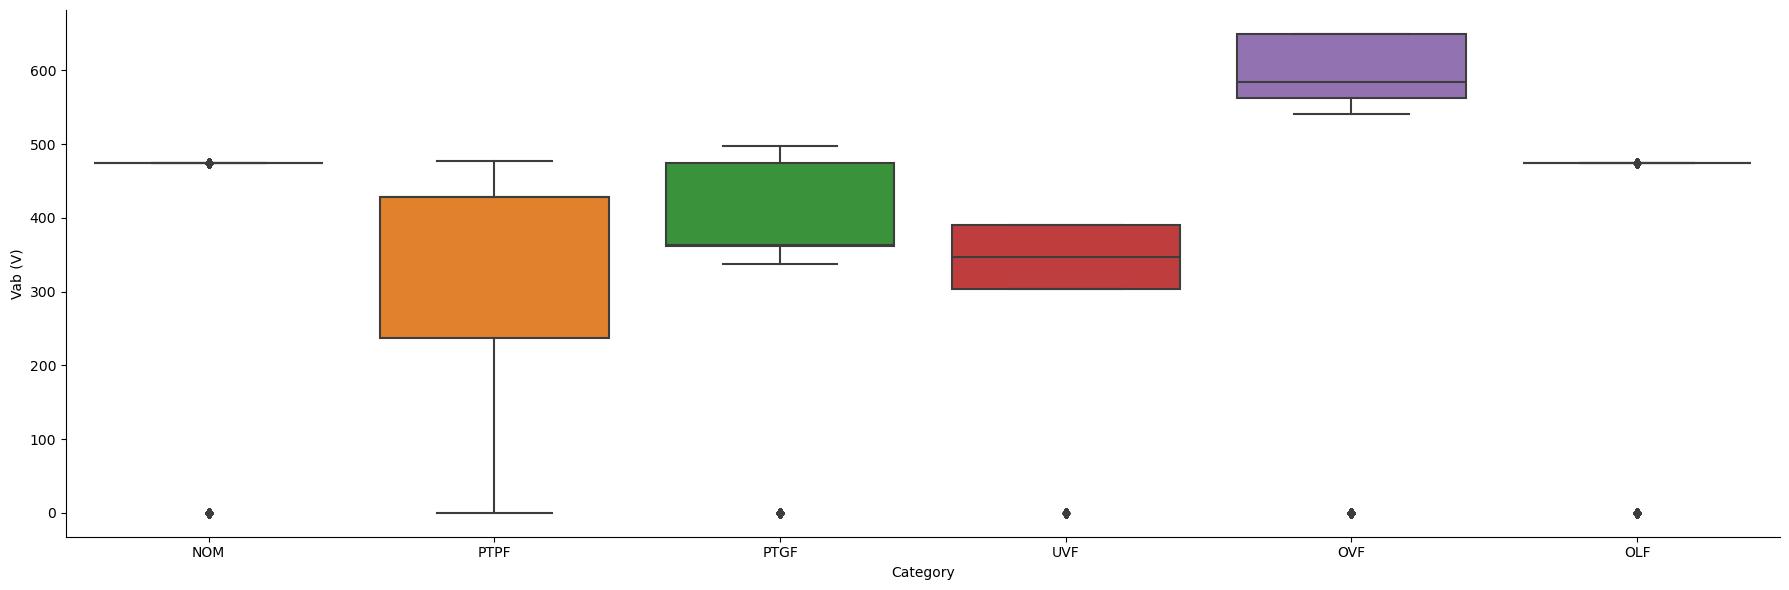

In [14]:
sns.catplot(data=new_df, x='Category', y='Vab (V)', kind='box', height=6, aspect=3)

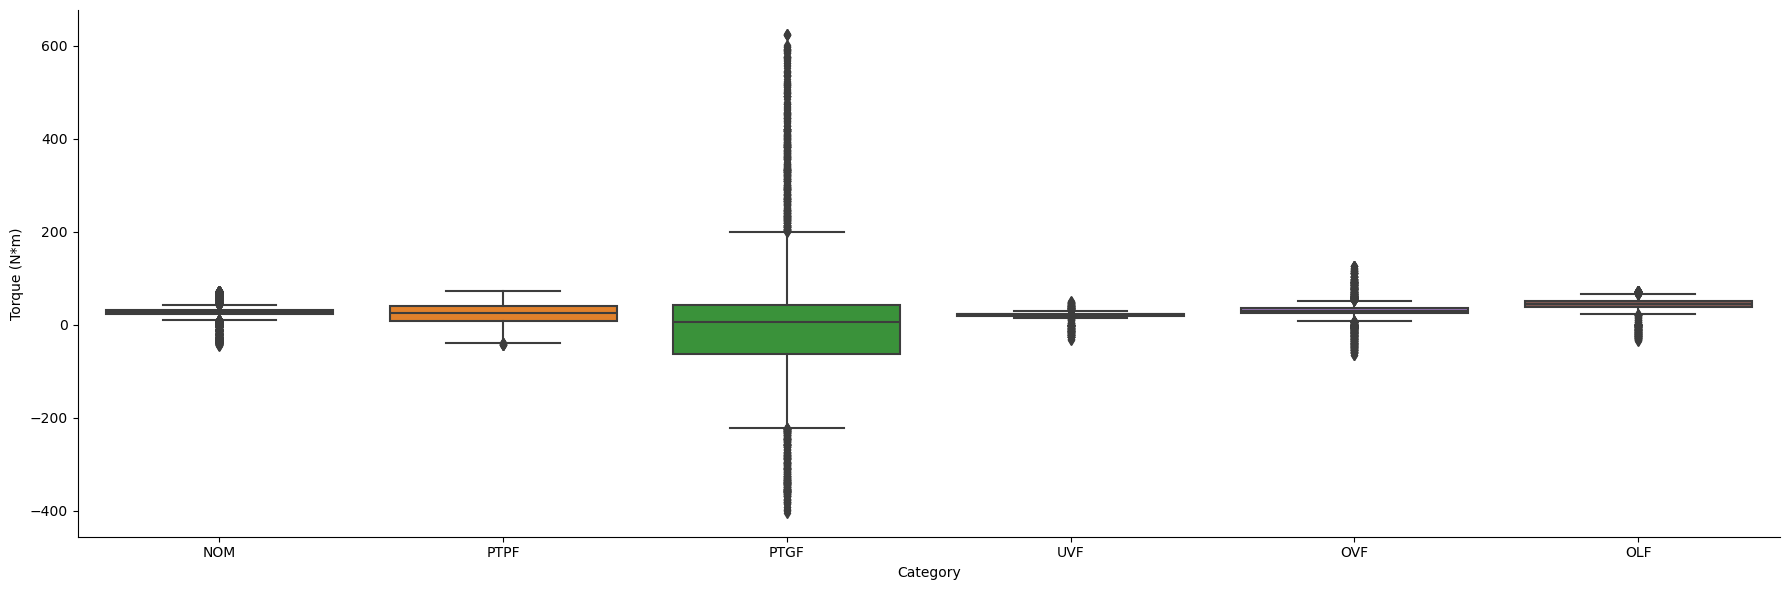

In [15]:
sns.catplot(data=new_df, x='Category', y='Torque (N*m)', kind='box', height=6, aspect=3)

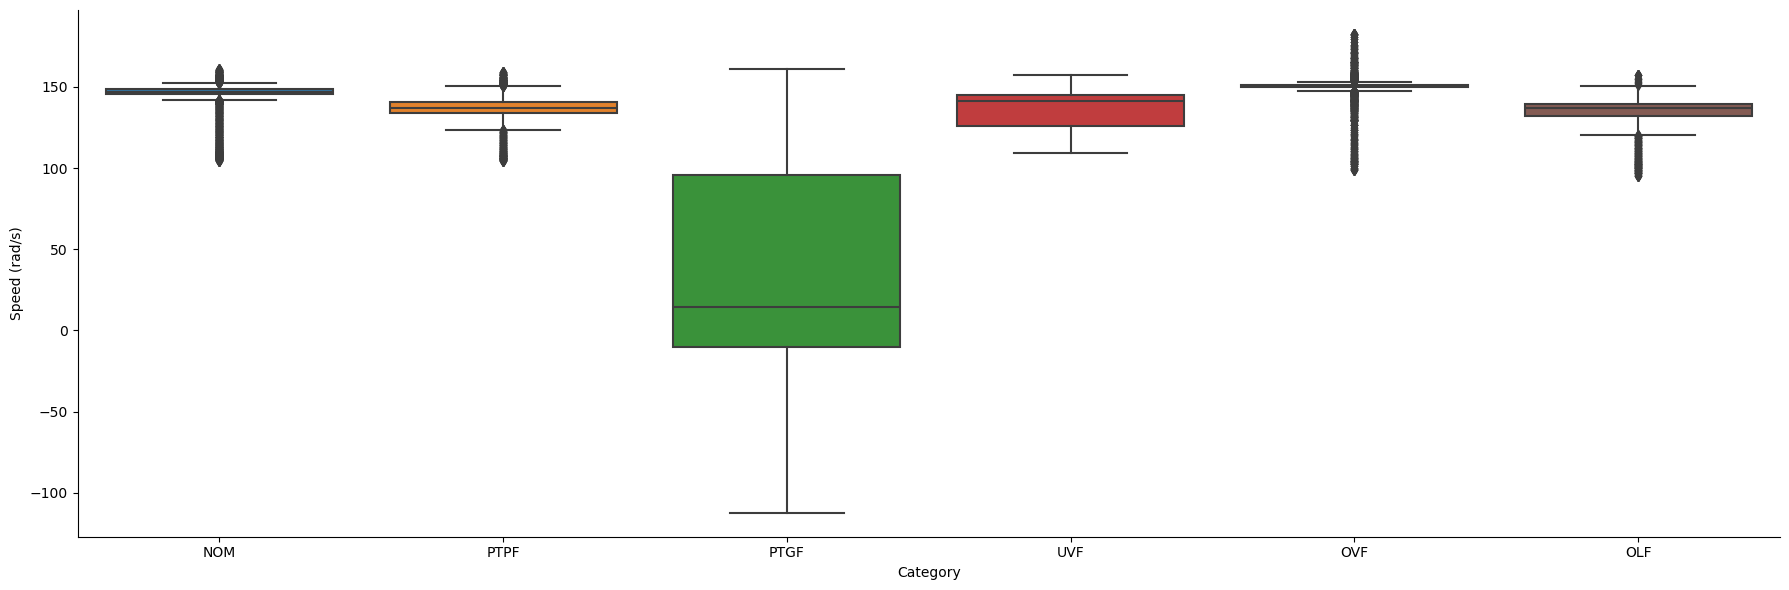

In [16]:
sns.catplot(data=new_df, x='Category', y='Speed (rad/s)',kind='box', height=6, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


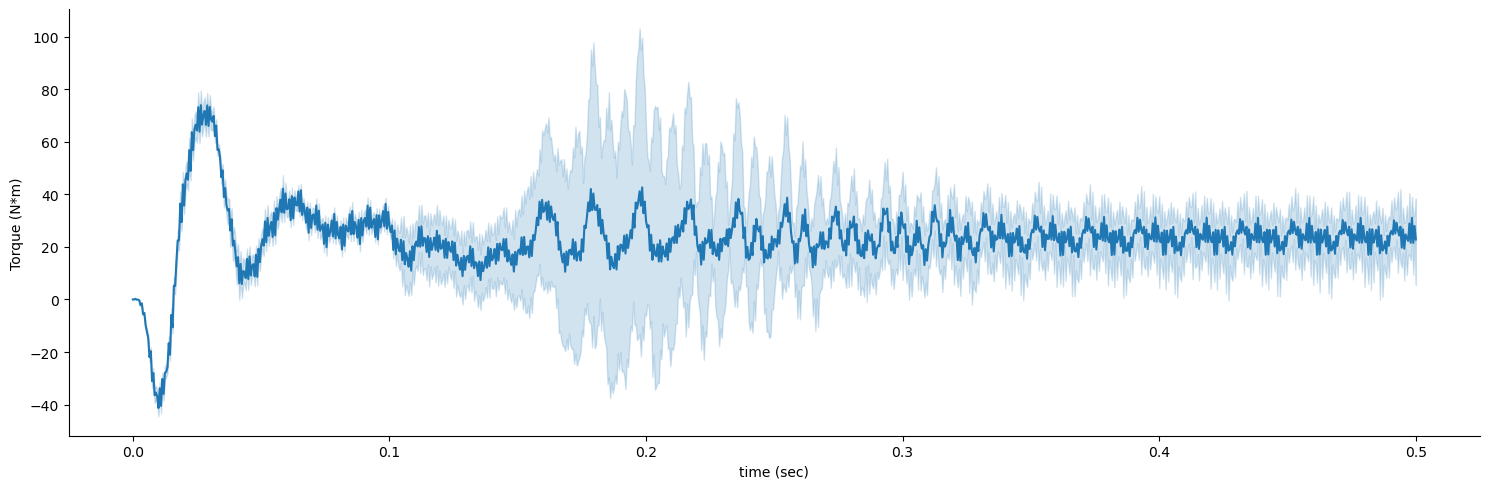

In [18]:
sns.relplot(data=new_df, x="time (sec)", y="Torque (N*m)", kind="line", height = 5, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


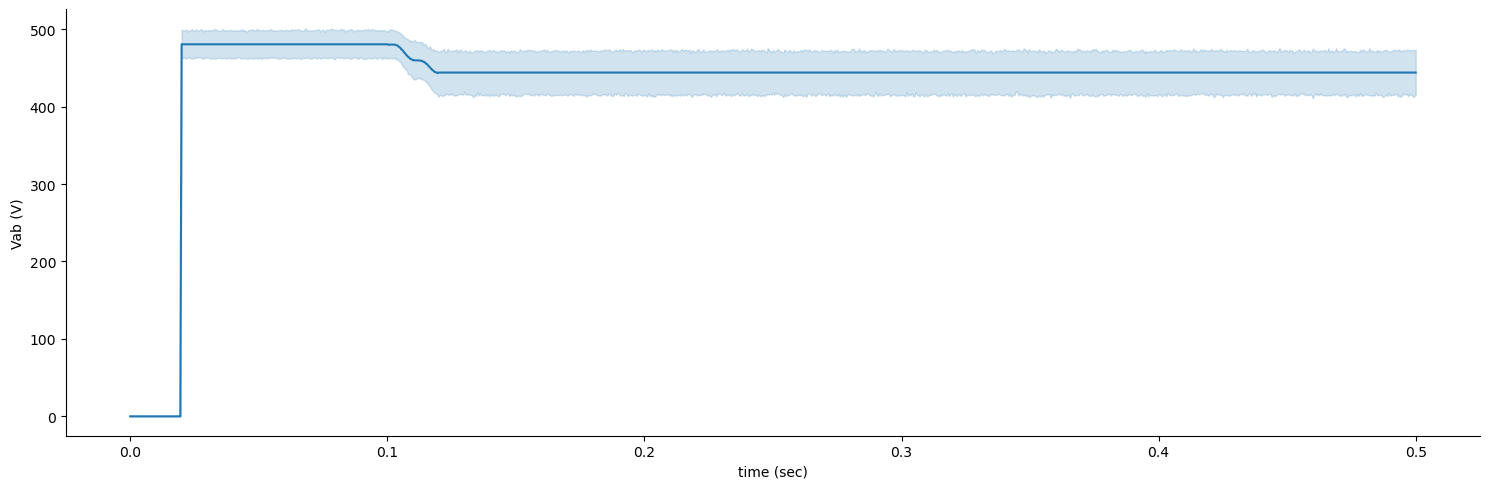

In [19]:
sns.relplot(data=new_df, x="time (sec)", y="Vab (V)", kind="line", height = 5, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


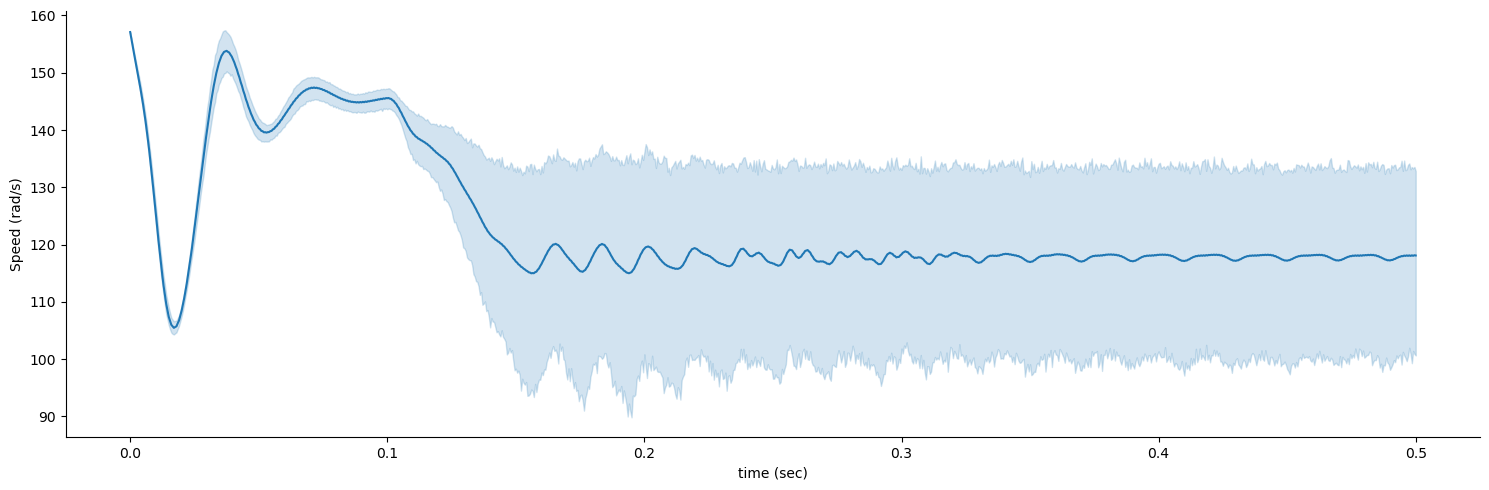

In [20]:
sns.relplot(data=new_df, x="time (sec)", y="Speed (rad/s)", kind="line", height = 5, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


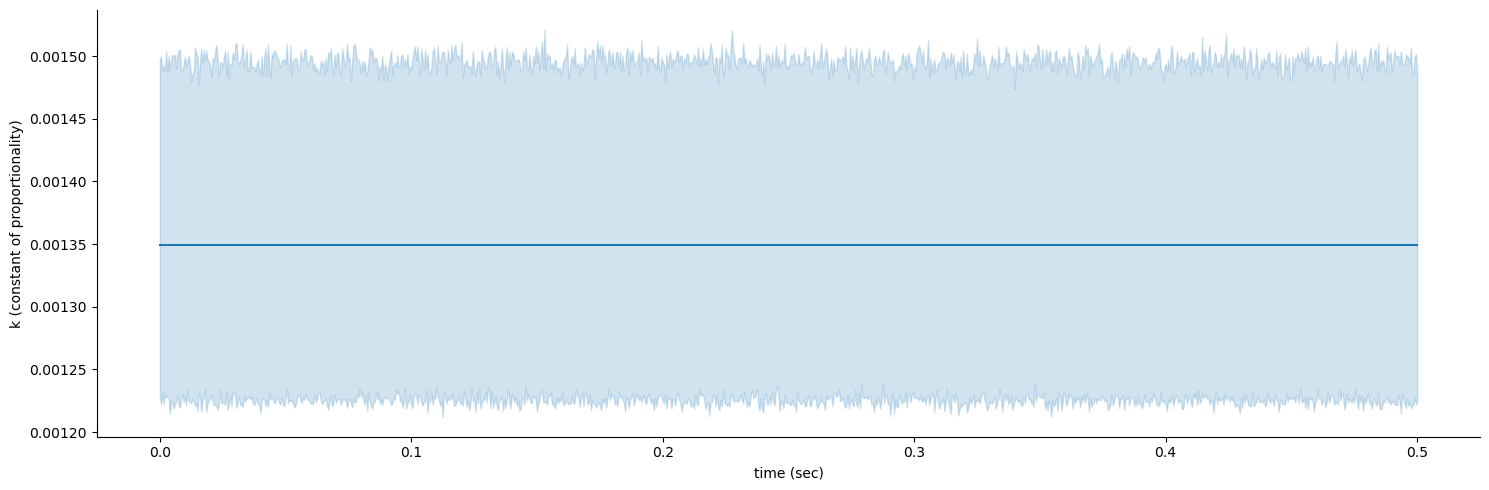

In [21]:
sns.relplot(data=new_df, x="time (sec)", y="k (constant of proportionality)", kind="line", height = 5, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


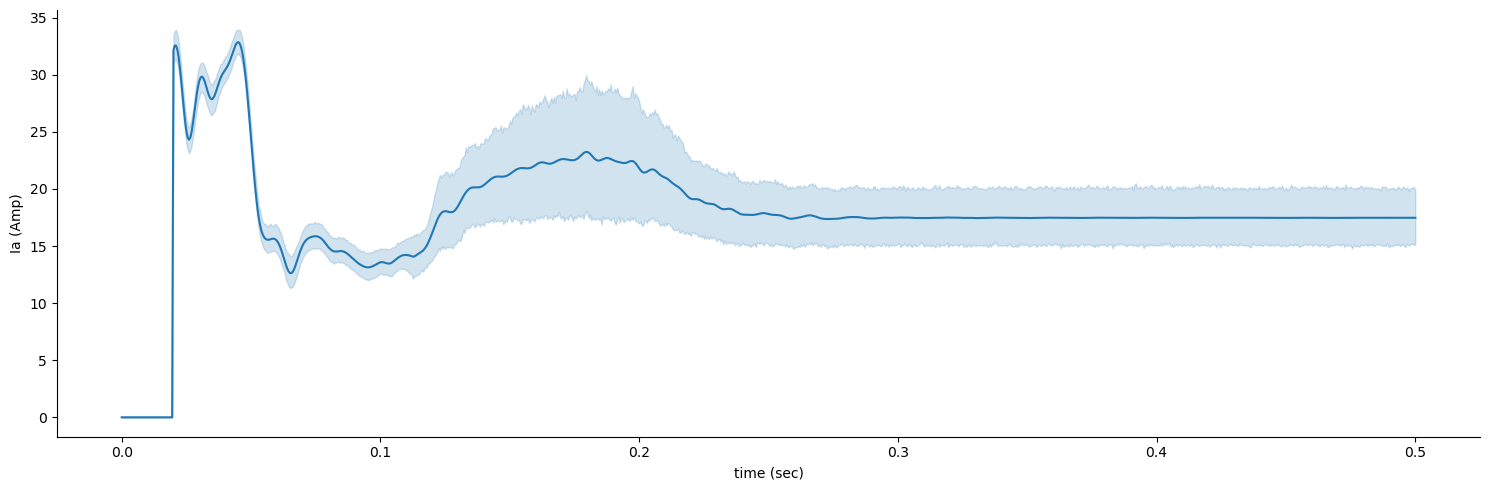

In [22]:
sns.relplot(data=new_df, x="time (sec)", y="Ia (Amp)", kind="line", height = 5, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


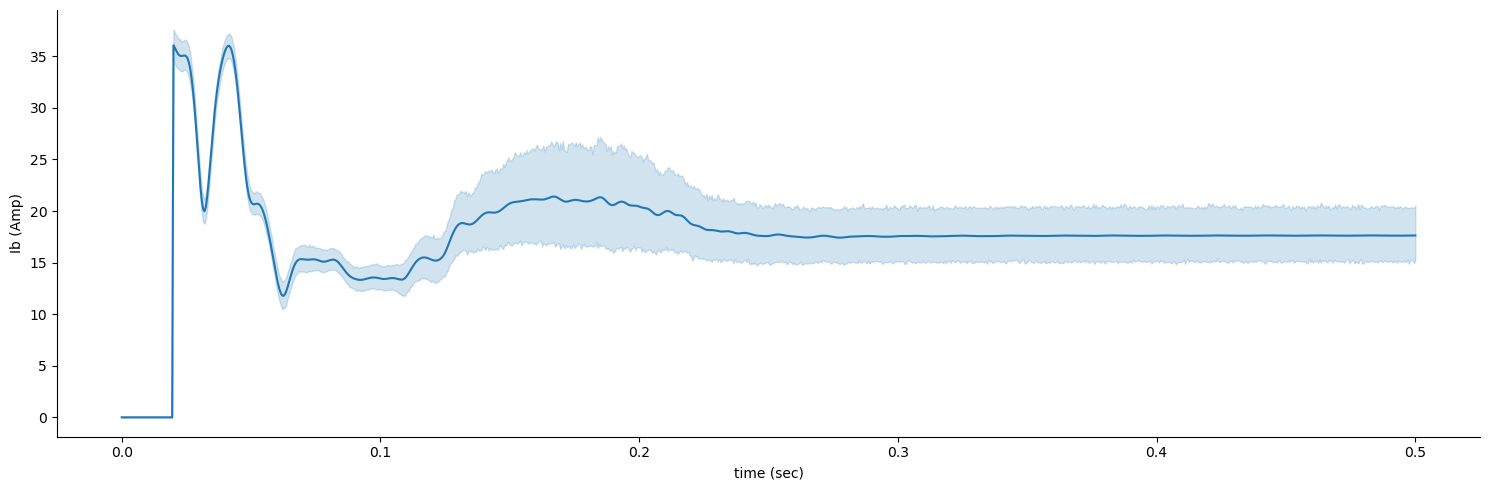

In [23]:
sns.relplot(data=new_df, x="time (sec)", y="Ib (Amp)", kind="line", height = 5, aspect=3)

C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adithiyha R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


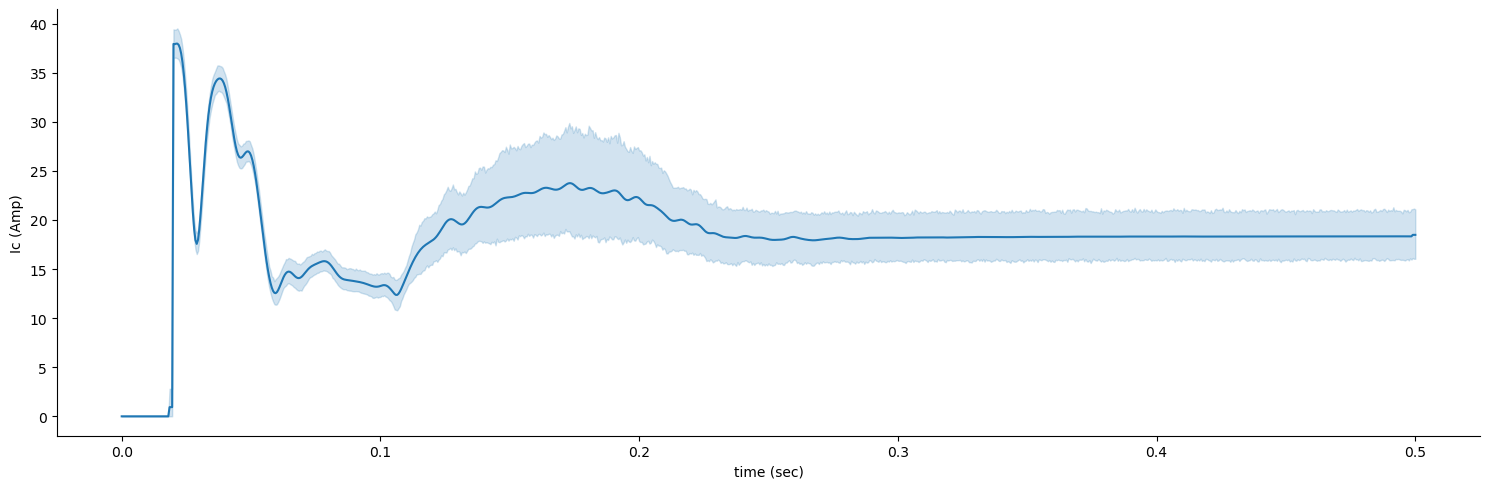

In [24]:
sns.relplot(data=new_df, x="time (sec)", y="Ic (Amp)", kind="line", height = 5, aspect=3)

In [25]:
label_category = LabelEncoder()
new_df['Category'] = label_category.fit_transform(new_df['Category'])
new_df.head()

,Tn (Rated Torque) N*m,k (constant of proportionality),time (sec),Ia (Amp),Ib (Amp),Ic (Amp),Vab (V),Torque (N*m),Speed (rad/s),Category
0,0.8,0.000948,0.0000,0.0,0.0,0.0,0.0,0.000000,157.079633,0
1,0.8,0.000948,0.0005,0.0,0.0,0.0,0.0,-0.009380,156.173693,0
2,0.8,0.000948,0.0010,0.0,0.0,0.0,0.0,0.217542,155.281539,0
3,0.8,0.000948,0.0015,0.0,0.0,0.0,0.0,-0.050265,154.401984,0
4,0.8,0.000948,0.0020,0.0,0.0,0.0,0.0,-0.076747,153.525611,0


In [26]:
new_df['Category'].unique()

array([0, 4, 3, 5, 2, 1])

In [27]:
new_df.Category.value_counts()

Category
0    13013
4     7007
3     7007
2     5005
1     5005
5     3003
Name: count, dtype: int64

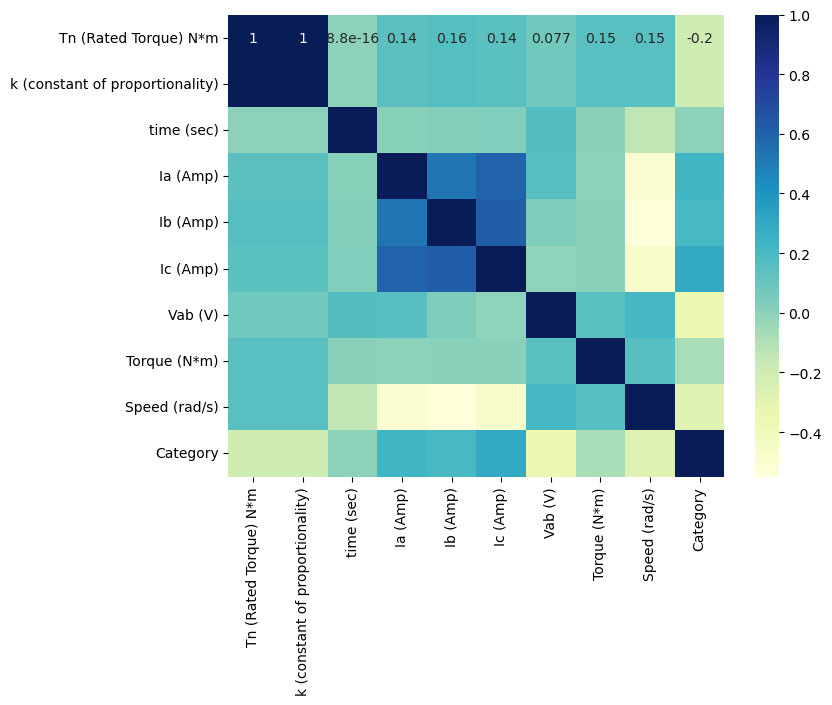

In [28]:
plt.figure(figsize=(8,6))
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True) 

In [29]:
new_df = new_df.drop(['time (sec)','Torque (N*m)'], axis=1)
new_df

,Tn (Rated Torque) N*m,k (constant of proportionality),Ia (Amp),Ib (Amp),Ic (Amp),Vab (V),Speed (rad/s),Category
0,0.800,0.000948,0.000000,0.000000,0.000000,0.000000,157.079633,0
1,0.800,0.000948,0.000000,0.000000,0.000000,0.000000,156.173693,0
2,0.800,0.000948,0.000000,0.000000,0.000000,0.000000,155.281539,0
3,0.800,0.000948,0.000000,0.000000,0.000000,0.000000,154.401984,0
4,0.800,0.000948,0.000000,0.000000,0.000000,0.000000,153.525611,0
...,...,...,...,...,...,...,...,...
40035,1.175,0.001393,11.904014,11.904349,11.903873,649.502289,150.891922,2
40036,1.175,0.001393,11.904115,11.904352,11.903855,649.502289,151.074546,2
40037,1.175,0.001393,11.904214,11.904339,11.903857,649.502289,150.908184,2
40038,1.175,0.001393,11.904308,11.904314,11.903879,649.502289,151.050960,2


In [30]:
x = new_df.drop(['Category'], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40040 entries, 0 to 40039
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tn (Rated Torque) N*m            40040 non-null  float64
 1   k (constant of proportionality)  40040 non-null  float64
 2   Ia (Amp)                         40040 non-null  float64
 3   Ib (Amp)                         40040 non-null  float64
 4   Ic (Amp)                         40037 non-null  float64
 5   Vab (V)                          40040 non-null  float64
 6   Speed (rad/s)                    40040 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [31]:
y = new_df['Category']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40040 entries, 0 to 40039
Series name: Category
Non-Null Count  Dtype
--------------  -----
40040 non-null  int32
dtypes: int32(1)
memory usage: 156.5 KB


In [32]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy = "mean"),
    MinMaxScaler()
)
numeric_transformer.fit(x)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

In [33]:
X = numeric_transformer.transform(x)
X = pd.DataFrame(X, columns = x.columns)
X.head()

,Tn (Rated Torque) N*m,k (constant of proportionality),Ia (Amp),Ib (Amp),Ic (Amp),Vab (V),Speed (rad/s)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.913450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.910378
2,0.0,0.0,0.0,0.0,0.0,0.0,0.907352
3,0.0,0.0,0.0,0.0,0.0,0.0,0.904369
4,0.0,0.0,0.0,0.0,0.0,0.0,0.901397


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) 
cv = KFold(n_splits=5)
params = [{'n_neighbors': np.arange(1, 50, 2),
           'weights': ['uniform', 'distance'],
           'p': [1,2],
           'n_jobs': [-1]
          }]
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=cv)
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_jobs': [-1],
                          'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [36]:
clf.best_params_

{'n_jobs': -1, 'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}

In [37]:
rf_clf = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 9,
                                n_estimators = 50, n_jobs = -1 )
cv = KFold(n_splits=10)
scores_rf = pd.DataFrame(cross_validate(rf_clf, X_train, y_train, scoring= 'accuracy', cv=cv, n_jobs=-1, 
error_score='raise', return_train_score=True))
scores_rf.mean()

fit_time       1.212319
score_time     0.231870
test_score     0.932661
train_score    0.945440
dtype: float64

In [38]:
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.9256993006993007

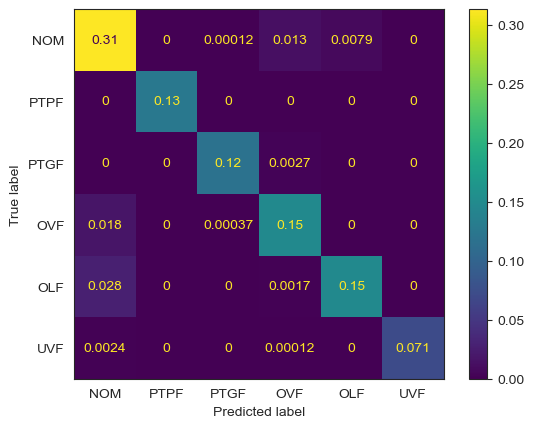

In [39]:
cm = confusion_matrix(y_test, rf_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NOM", "PTPF","PTGF", "OVF", "OLF", "UVF"])
sns.set_style("white")
plt.rc('font', size=10)
disp.plot()
plt.show()